In [1]:
# Import dependencies
from pymongo import MongoClient
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import folium


In [2]:
# Create an instance of MongoClient
mongo = MongoClient(port=27017)

In [3]:
# assign the COVID_and_Crime_Toronto database to a variable name
db = mongo['COVID_and_Crime_Toronto']

In [4]:
# assign the collection to a variable
covid_cases = db['COVID_Cases']

In [5]:
census_tract_boundaries = db['Census_Tract_Boundaries']

In [6]:
crime_data = db['Crime_Data']

In [7]:
# Inspecting the data
pprint(covid_cases.find_one())
pprint(census_tract_boundaries.find_one())
pprint(crime_data.find_one())


{'Age Group': '50 to 59 Years',
 'Assigned_ID': 1,
 'Classification': 'CONFIRMED',
 'Client Gender': 'FEMALE',
 'Episode Date': '2020-01-22',
 'Ever Hospitalized': 'No',
 'Ever Intubated': 'No',
 'Ever in ICU': 'No',
 'FSA': 'M2N',
 'Neighbourhood Name': 'Willowdale East',
 'Outbreak Associated': 'NO',
 'Outcome': 'RESOLVED',
 'Reported Date': '2020-01-23',
 'Source of Infection': 'Travel',
 '_id': 1}
{'_id': ObjectId('66c523684f40085c44dcb9bd'),
 'geometry': {'coordinates': [[[[-79.5029569066111, 43.6957370912699],
                                [-79.5041510283652, 43.6963525802959],
                                [-79.5021928156238, 43.6967631023826],
                                [-79.5023795727011, 43.6975937194396],
                                [-79.5048864370634, 43.6970233182125],
                                [-79.5049436531798, 43.6970102908891],
                                [-79.5053547971446, 43.6969167129842],
                                [-79.5082464525658, 

In [8]:
# Converting to Pandas DataFrame
covid_df = pd.DataFrame(list(covid_cases.find()))
census_df = pd.DataFrame(list(census_tract_boundaries.find()))
crime_df = pd.DataFrame(list(crime_data.find()))

In [9]:
covid_df.head()

,_id,Assigned_ID,Outbreak Associated,Age Group,Neighbourhood Name,FSA,Source of Infection,Classification,Episode Date,Reported Date,Client Gender,Outcome,Ever Hospitalized,Ever in ICU,Ever Intubated
0,1,1,NO,50 to 59 Years,Willowdale East,M2N,Travel,CONFIRMED,2020-01-22,2020-01-23,FEMALE,RESOLVED,No,No,No
1,2,2,NO,50 to 59 Years,Willowdale East,M2N,Travel,CONFIRMED,2020-01-21,2020-01-23,MALE,RESOLVED,Yes,No,No
2,3,3,NO,20 to 29 Years,Parkwoods-Donalda,M3A,Travel,CONFIRMED,2020-02-05,2020-02-21,FEMALE,RESOLVED,No,No,No
3,4,4,NO,60 to 69 Years,Church-Yonge Corridor,M4W,Travel,CONFIRMED,2020-02-16,2020-02-25,FEMALE,RESOLVED,No,No,No
4,5,5,NO,60 to 69 Years,Church-Yonge Corridor,M4W,Travel,CONFIRMED,2020-02-20,2020-02-26,MALE,RESOLVED,No,No,No


In [10]:
census_df.head()

,_id,type,properties,geometry
0,66c523684f40085c44dcb9bd,Feature,"{'_id': 1, 'AREA_ID': 2501286, 'AREA_ATTR_ID':...","{'type': 'MultiPolygon', 'coordinates': [[[[-7..."
1,66c523684f40085c44dcb9be,Feature,"{'_id': 2, 'AREA_ID': 2501285, 'AREA_ATTR_ID':...","{'type': 'MultiPolygon', 'coordinates': [[[[-7..."
2,66c523684f40085c44dcb9bf,Feature,"{'_id': 3, 'AREA_ID': 2501284, 'AREA_ATTR_ID':...","{'type': 'MultiPolygon', 'coordinates': [[[[-7..."
3,66c523684f40085c44dcb9c0,Feature,"{'_id': 4, 'AREA_ID': 2501283, 'AREA_ATTR_ID':...","{'type': 'MultiPolygon', 'coordinates': [[[[-7..."
4,66c523684f40085c44dcb9c1,Feature,"{'_id': 5, 'AREA_ID': 2501282, 'AREA_ATTR_ID':...","{'type': 'MultiPolygon', 'coordinates': [[[[-7..."


In [11]:
crime_df.head()

,_id,type,id,geometry,properties
0,66c524f0c3c751d1e06725c4,Feature,98878,"{'type': 'Point', 'coordinates': [-79.38208824...","{'OBJECTID': 98878, 'EVENT_UNIQUE_ID': 'GO-201..."
1,66c524f0c3c751d1e06725c5,Feature,98879,"{'type': 'Point', 'coordinates': [-79.38208824...","{'OBJECTID': 98879, 'EVENT_UNIQUE_ID': 'GO-201..."
2,66c524f0c3c751d1e06725c6,Feature,98881,"{'type': 'Point', 'coordinates': [-79.35608913...","{'OBJECTID': 98881, 'EVENT_UNIQUE_ID': 'GO-201..."
3,66c524f0c3c751d1e06725c7,Feature,98882,"{'type': 'Point', 'coordinates': [-79.25620904...","{'OBJECTID': 98882, 'EVENT_UNIQUE_ID': 'GO-201..."
4,66c524f0c3c751d1e06725c8,Feature,98883,"{'type': 'Point', 'coordinates': [-79.36477315...","{'OBJECTID': 98883, 'EVENT_UNIQUE_ID': 'GO-201..."


In [12]:
# Extract OCC_DATE from the properties dictionary
crime_df['OCC_DATE'] = crime_df['properties'].apply(lambda x: x.get('OCC_DATE'))

# Convert the extracted OCC_DATE to datetime
crime_df['OCC_DATE'] = pd.to_datetime(crime_df['OCC_DATE'], unit='ms')

# Now you can work with the OCC_DATE as a regular datetime column
print(crime_df['OCC_DATE'].head())


0   2017-01-01 05:00:00
1   2017-01-01 05:00:00
2   2017-01-01 05:00:00
3   2017-01-01 05:00:00
4   2017-01-01 05:00:00
Name: OCC_DATE, dtype: datetime64[ns]


In [13]:
# Extracting other fields from properties
crime_df['OCC_YEAR'] = crime_df['properties'].apply(lambda x: x.get('OCC_YEAR'))
crime_df['MCI_CATEGORY'] = crime_df['properties'].apply(lambda x: x.get('MCI_CATEGORY'))


In [14]:
# Checking the first few rows of the relevant columns
print(crime_df[['OCC_DATE', 'OCC_YEAR', 'MCI_CATEGORY']].head())


             OCC_DATE  OCC_YEAR MCI_CATEGORY
0 2017-01-01 05:00:00      2017      Assault
1 2017-01-01 05:00:00      2017      Assault
2 2017-01-01 05:00:00      2017      Assault
3 2017-01-01 05:00:00      2017      Assault
4 2017-01-01 05:00:00      2017      Assault


In [15]:
# Data cleansing and preprocessing

In [16]:
covid_df.isnull().sum()  # Checking for missing values
crime_df.fillna('Unknown', inplace=True)  # filling missing values

In [17]:
covid_df['Reported Date'] = pd.to_datetime(covid_df['Reported Date'])
crime_df['OCC_DATE'] = pd.to_datetime(crime_df['OCC_DATE'], unit='ms')

In [18]:
#Filter data
filtered_covid_df = covid_df[covid_df['Reported Date'] >= '2020-01-01']
filtered_crime_df = crime_df[(crime_df['OCC_YEAR'] == 2020) & (crime_df['MCI_CATEGORY'] == 'Assault')]

In [19]:
# Descriptive Statistics
covid_df.describe()
crime_df['MCI_CATEGORY'].value_counts()

MCI_CATEGORY
Assault            119569
Break and Enter     41930
Auto Theft          36114
Robbery             19660
Theft Over           7605
Name: count, dtype: int64

In [20]:
covid_grouped = covid_df.groupby('Neighbourhood Name').size()
crime_grouped = crime_df.groupby(['OCC_YEAR', 'MCI_CATEGORY']).size().unstack()

In [21]:
covid_grouped.head()

Neighbourhood Name
                                13699
Agincourt North                  3122
Agincourt South-Malvern West     2768
Alderwood                        1458
Annex                            3871
dtype: int64

In [22]:
crime_grouped.head()

MCI_CATEGORY,Assault,Auto Theft,Break and Enter,Robbery,Theft Over
OCC_YEAR,,,,,
2017,19692,3646,6932,4097,1188
2018,20055,4804,7654,3759,1289
2019,21086,5379,8573,3723,1374
2020,18409,5798,6963,2863,1212
2021,19118,6634,5724,2287,1090


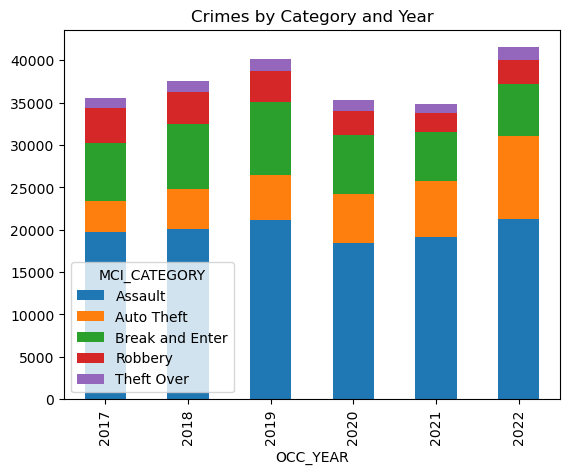

In [23]:
crime_grouped.plot(kind='bar', stacked=True, title='Crimes by Category and Year')
plt.show()


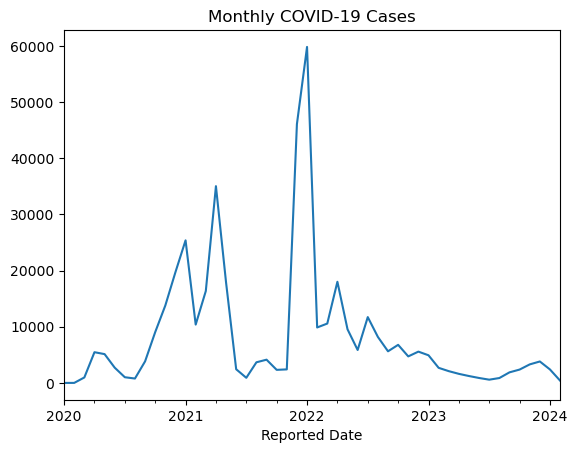

In [24]:
covid_df.resample('M', on='Reported Date').size().plot(title='Monthly COVID-19 Cases')
plt.show()
